# Tutorial Exercises

We will be using the statsmodels package in Python, so we will need to import this along with the other Python packages we have been using.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries


In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Life satisfaction full dataset

Let's import the full dataset for life satisfaction vs GDP

In [2]:
happy = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/All_countries_lifesat_2020.csv')
happy

,Country,LifeSat,GDPpc
0,Afghanistan,2.40,1.97
1,Albania,5.20,13.19
2,Algeria,5.12,10.74
3,American Samoa,NaN,0.00
4,Andorra,NaN,0.00
...,...,...,...
233,Western Sahara,NaN,0.00
234,World,NaN,16.19
235,Yemen,4.20,0.00
236,Zambia,3.76,3.28


### Data cleaning

We are working with real data here! We need to examine it and take any necessary steps to clean the data before we begin analysis. 

* What steps do you need to take to clean the data? 
* Are there any data points that look wrong (e.g., too low or too high)? Change any suspicious values to ‘NaN’.
* How many missing data points do you have on lifesat? 
* How many missing data points do you have on GDP per capita?


In [3]:
# check how many Nans there are in each column
happy.isna().sum()

Country     0
LifeSat    92
GDPpc       0
dtype: int64

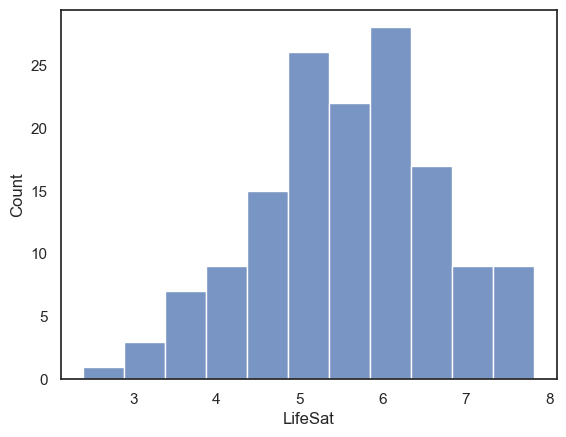

In [4]:
# check distribution of LifeSat
sns.histplot(data=happy, x='LifeSat')
plt.show()

<font color=red>There are no obviously problematic values in the histogram</font>

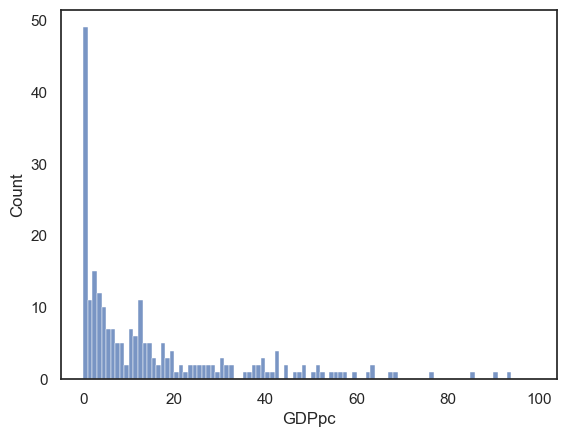

In [5]:
# check distribution of GDPpc
sns.histplot(data=happy, x='GDPpc', bins=range(0,100))
plt.show()

<font color=red>It looks like there are suspiciously many values of GDP near zero. Let's check if they are exactly zero, in which case they are probably dummy values rather than real values.</font>

In [6]:
np.sum(happy.GDPpc==0)

47

<font color=red>Yes, I think we need to replace those with NaNs</font>

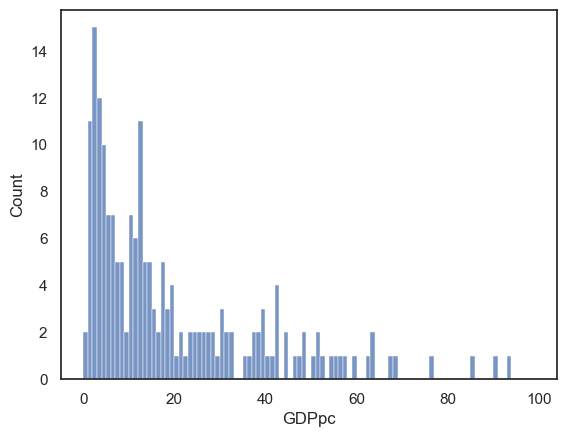

In [7]:
happy.loc[(happy.GDPpc==0),'GDPpc']=np.nan
# check it worked
sns.histplot(data=happy, x='GDPpc', bins=range(0,100))
plt.show()

<font color=red>Looks good! The spike at zero has gone.</font>

* How many valid data points do you have? 

<font color=red>You could check how many cases are non-nan in each column quite easily.</font>

In [8]:
happy.count()

Country    238
LifeSat    146
GDPpc      191
dtype: int64

<font color=red>If you want to check how many complete rows we have (countries with no nan for any variable) you need to do this:</font>

In [9]:
sum(happy.isnull().sum(axis=1)==0)

141

### Describing the data

Let’s begin with some descriptive analysis before running our first regression model. 

Run a scatterplot. 

Be sure to plot $y$ on the $y$-axis and $x$ on the $x$-axis. 
(If you are not sure which is which, discuss with your tutor).


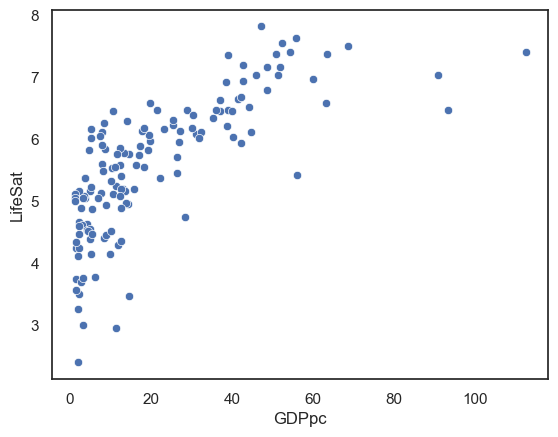

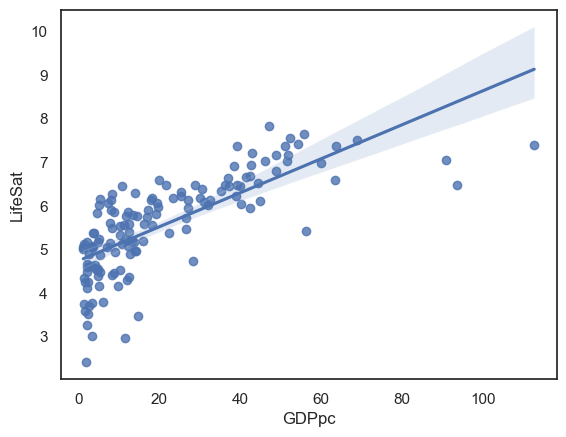

In [10]:
# Your code here for the scatterplot
sns.scatterplot(data=happy, x='GDPpc',y='LifeSat')
plt.show()

# OR
sns.regplot(data=happy, x='GDPpc',y='LifeSat')
plt.show()

* What are your initial conclusions about the relationship between GDP and life satisfaction? 

<font color=red>
    
* LifeSat goes up as GDPpc goes up
    
* The relationship is non-linear (asyptote at high GDPpc) - so for poor countries, a small increase in GDP translates to a big increase in lifesat
    
* Many data points are clustered at low GDPpc
</font>

### Regression model

It’s time to run the regression model. 

The basic code can be copied from the worked examples in the previous notebook, but you will need to modify it. 

Where do you tell Python which is the $y$ variable, and which is the $x$?

In [11]:
# code for regression model
# run the regression model

# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = happy, formula = 'LifeSat ~ GDPpc')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

# note you get a warning message because the dataset is quite small - disregard this

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeSat   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.07e-25
Time:                        15:27:03   Log-Likelihood:                -156.58
No. Observations:                 141   AIC:                             317.2
Df Residuals:                     139   BIC:                             323.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7338      0.089     53.052      0.000       4.557       4.910
GDPpc          0.0391      0.003     12.967      0.000       0.033       0.045
==============================================================================
Omnibus:                       20.169   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.974
Skew:                          -0.919   Prob(JB):                     6.22e-06
Kurtosis:                       3.837   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Look at the Python regression output. 

* Find the intercept and the slope. 
    * <font color=red>intercept=4.73, slope=0.0391</font>
* Write out the regression equation (on your computer or by hand on paper). 
    * <font color=red> lifesat = 4.73 + 0.0391 $\times$ GDPpc</font>
* Make notes on how to interpret the intercept and the slope. E.g., “the intercept is the average life satisfaction in a country with…” And “the slope of x.xx means that for every additional 1000 dollars in GDP…”
    * <font color=red> The intercept is the average life satisfaction in a country with a zero GDP (although no countries have a GDP which is actually zero, some are close to zero so this does make some sense). The slope of 0.0391 means that for every additional 1000 dolalrs in GDP, lifesat increases by 0.0391 points - or about 25000 dollars in GDP is needed to increase lifesat by one whole point</font>

### Regression plot

Let’s add the regression line to the scatterplot in Python. 


`seaborn` has a special plotting function for plotting a scatterplot with regression line included, called `sns.regplot`. 

Give it a try, the syntax is the same as for `sns.scatterplot`


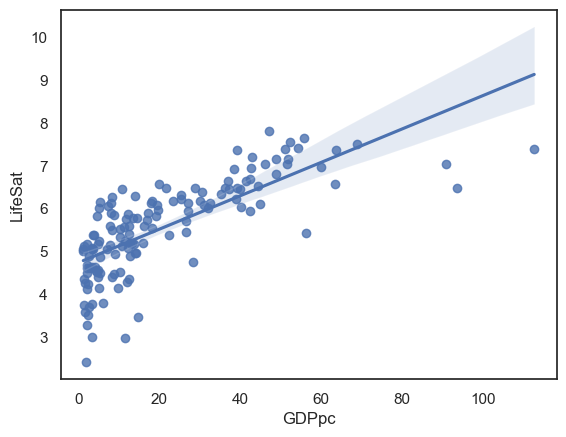

In [12]:
# your code here for a scatterplot with regression line using sns.regplot
sns.regplot(data=happy, x='GDPpc',y='LifeSat')
plt.show()

Eyeballing the scatterplot, how well do you think the regression line fits the data points? Do you think there are any outliers? 

<font color=red>
        
* The relationship is non-linear (asyptote at high GDPpc) - so for poor countries, a small increase in GDP translates to a big increase in lifesat
    
* Many data points are clustered at low GDPpc
</font>

We can see that several countries with very large GDPs are below the regression line. Also, that many countries with very low GDP are a long way from the regression line. We can examine potential outliers more systematically, by asking Python to calculate residuals (and predicted values) for us.

In [13]:
# Your code here to generate predictions (y-hat) and residuals for each data point.
# add them as columns to your dataframe
# view the resulting dataframe
happy['yhat'] = 4.73 + 0.0391*happy.GDPpc
happy['resid']=happy.LifeSat - happy.yhat
happy

,Country,LifeSat,GDPpc,yhat,resid
0,Afghanistan,2.40,1.97,4.807027,-2.407027
1,Albania,5.20,13.19,5.245729,-0.045729
2,Algeria,5.12,10.74,5.149934,-0.029934
3,American Samoa,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN
...,...,...,...,...,...
233,Western Sahara,NaN,NaN,NaN,NaN
234,World,NaN,16.19,5.363029,NaN
235,Yemen,4.20,NaN,NaN,NaN
236,Zambia,3.76,3.28,4.858248,-1.098248


### SSE

Can you find the sum of squared residuals using an equation?

Hint: The code for $x^2$ in Python is `x**2`

In [14]:
# Your code here for squaring then adding up all the residuals.
SSE = np.nansum(happy.resid**2)
SSE

76.086046738647

* How meaningful is the sum of squared residuals (or “sum of squared error” - SSE)? What does it tell us?
    * We know this is the minimized residual. Because this line is fitted using the method of least squares, there is no other line that could fit the data with a lower SSE. 

The sum of squared residuals is provided by `statsmodels` as `reg_results.ssr` - 

* check that the sum of squared residuals you calculated matches the output of `reg_results.ssr`




In [15]:
# your code here
reg_results.ssr

76.08438406844218

<font color=red>Yes, the value from `statsmodels` matches the one we calculated</font>

### Check datapoints that are not well fit by the model

Sort and display the data and find any very large residuals (remember outliers could have a positive or negative residual. Look for both!). Choose the 6 largest residuals (in absolute terms). Which countries are they? Are they in the same region, are they rich or poor? 

Now change the life satisfaction for these six countries to ‘NaN’ so that we can exclude them from the analysis. Store the data with the excluded outliers with a new name. Then re-run the regression, and the scatterplot with regression line.


In [16]:
# your code here!
happy.sort_values(by='resid', ascending=True).head(7)

,Country,LifeSat,GDPpc,yhat,resid
0,Afghanistan,2.40,1.97,4.807027,-2.407027
115,Lebanon,2.96,11.49,5.179259,-2.219259
190,Singapore,6.48,93.40,8.381940,-1.901940
237,Zimbabwe,3.00,3.35,4.860985,-1.860985
27,Botswana,3.47,14.65,5.302815,-1.832815
121,Luxembourg,7.40,112.56,9.131096,-1.731096
175,Rwanda,3.27,2.10,4.812110,-1.542110


In [17]:
happy.sort_values(by='resid', ascending=False).head(6)

,Country,LifeSat,GDPpc,yhat,resid
110,Kosovo,6.46,10.71,5.148761,1.311239
70,Finland,7.82,47.15,6.573565,1.246435
150,Nicaragua,6.16,5.28,4.936448,1.223552
85,Guatemala,6.26,8.39,5.058049,1.201951
101,Israel,7.36,39.06,6.257246,1.102754
91,Honduras,6.02,5.14,4.930974,1.089026


In [18]:
<font color=red>The size largest residuals are all negative.

Now we exclude them</font>

SyntaxError: invalid syntax (2347751598.py, line 1)

In [51]:
happy_clean=happy
happy_clean.loc[(happy.resid<-1.7),'LifeSat']=np.nan
happy_clean.sort_values(by='resid', ascending=True).head(7)

,Country,LifeSat,GDPpc,resid,yhat
0,Afghanistan,NaN,1.97,-2.407027,4.807027
115,Lebanon,NaN,11.49,-2.219259,5.179259
190,Singapore,NaN,93.40,-1.901940,8.381940
237,Zimbabwe,NaN,3.35,-1.860985,4.860985
27,Botswana,NaN,14.65,-1.832815,5.302815
121,Luxembourg,NaN,112.56,-1.731096,9.131096
175,Rwanda,3.27,2.10,-1.542110,4.812110


In the new analysis with the six outliers excluded, do your conclusions about the relationship between GDP and life satisfaction change, or stay the same?

We will learn more about the assumptions of regression in the next week or two, but looking back at the scatterplot, have you noticed any potential concerns about the model?



<font color=red>We could re-run the regression plot and the regression itself</font>

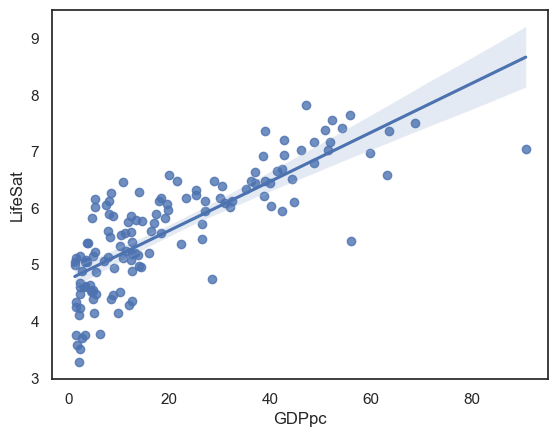

In [52]:
# your code here for a scatterplot with regression line using sns.regplot
sns.regplot(data=happy_clean, x='GDPpc',y='LifeSat')
plt.show()

In [54]:
# code for regression model
# run the regression model

# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = happy_clean, formula = 'LifeSat ~ GDPpc')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

# note you get a warning message because the dataset is quite small - disregard this

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeSat   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     228.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.21e-30
Time:                        15:31:32   Log-Likelihood:                -124.49
No. Observations:                 135   AIC:                             253.0
Df Residuals:                     133   BIC:                             258.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7369      0.079     60.196      0.000       4.581       4.893
GDPpc          0.0433      0.003     15.107      0.000       0.038       0.049
==============================================================================
Omnibus:                        5.933   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.578
Skew:                          -0.488   Prob(JB):                       0.0615
Kurtosis:                       3.195   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=red>The values of the intercept and slope change but both are still significant.</font>